<a href="https://colab.research.google.com/github/frsalarcon/Detector-de-celulas-cancerigenas/blob/main/test_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo de prueba 1. CNN cancer de mamas. 
1000 imagenes de entrenamiento y  y 2000 de validacion.

In [28]:
from google.colab import drive
drive.mount ('/content/drive')
import sys
import os

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
from tensorflow.keras import layers
# Preprocesamiento de imagenes.
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
# Optimizador (Adam)
from tensorflow.python.keras import optimizers
from tensorflow.keras import optimizers
# Redes secuenciales
from tensorflow.python.keras.models import Sequential
# Capas: 
from tensorflow.python.keras.layers import Dropout, Flatten, Dense, Activation
# Convolucion y maxpooling
from tensorflow.python.keras.layers import  Convolution2D, MaxPooling2D
# Para cerrar el backend de Keras
from tensorflow.python.keras import backend as K

In [4]:
# Ordenar data
data_validacion='/content/drive/MyDrive/data/validacion'
data_entrenamiento='/content/drive/MyDrive/data/entrenamiento'

Una tasa de aprendizaje mayor significa que el modelo podría alcanzar la pérdida mínima más rápido, pero también podría sobrepasar la mínima. Es más probable que las tasas de aprendizaje más pequeñas alcancen el mínimo, pero pueden llevar más tiempo. Por lo general, probamos tasas de aprendizaje entre 0,001 y 0,1 para encontrar la mejor para el entrenamiento de modelos. Puede establecer la tasa de aprendizaje a través del learning_rate

batch_sizeestá el tamaño del lote de datos, decidido en tiempo de ejecución).

In [5]:
epocas=20
longitud, altura = 150, 150
batch_size = 10
pasos = 99
validation_steps = 33
filtrosconv1 = 32
filtrosconv2 = 64
tamaño_filtro1 = (3, 3)
tamaño_filtro2 = (2, 2)
tamaño_pool = (2, 2)
clases = 2
lr = 0.0004

In [6]:
# Pre-procesamiento para entrenamiento
# rescale= normalizacion, shear_range= inclinación , horizontal_flip=True  invertir imagen
entrenamiento_datagen = ImageDataGenerator(rescale=1. / 255, shear_range=0.2, horizontal_flip=True)
# # Pre-procesamiento para validación
validacion_datagen=ImageDataGenerator( rescale=1./255)

batch_size:  define la cantidad de muestras que se propagarán a través de la red.

 *Por ejemplo, supongamos que tiene 1050 muestras de entrenamiento y desea configurar un valor batch_sizeigual a 100. El algoritmo toma las primeras 100 muestras (del 1º al 100º) del conjunto de datos de entrenamiento y entrena la red. A continuación, toma las segundas 100 muestras (de la 101 a la 200) y vuelve a entrenar la red.*


categorical: significa que las etiquetas están codificadas como un vector categórico (por ejemplo, para categorical_crossentropypérdida). - 'binario' significa que las etiquetas (solo puede haber 2) están codificadas como float32escalares con valores 0 o 1 (por ejemplo, para binary_crossentropy). - Ninguno (sin etiquetas).

In [7]:
# Training
imagen_entrenamiento=entrenamiento_datagen.flow_from_directory(data_entrenamiento, target_size=(altura, longitud), batch_size=batch_size, class_mode='categorical')


# Validate
imagen_validacion=validacion_datagen.flow_from_directory(data_validacion, target_size=(altura, longitud), batch_size=batch_size, class_mode='categorical')

Found 999 images belonging to 2 classes.
Found 2045 images belonging to 2 classes.


En Keras, cada modelo de red neuronal es una instancia del Sequential.
Esto actúa como el contenedor de la red neuronal, lo que nos permite construir el modelo apilando múltiples capas dentro del Sequentialobjeto.
La capa de red neuronal de Keras más utilizada es la Densecapa. Esto representa una capa completamente conectada en la red neuronal y es el componente más importante de un modelo MLP.
Al construir un modelo, comenzamos inicializando un Sequentialobjeto. Podemos inicializar un Sequentialobjeto vacío y agregar capas al modelo usando la addfunción, o podemos inicializar directamente el Sequentialobjeto con una lista de capas.

La primera capa del Sequentialmodelo representa la capa de entrada. Por lo tanto, en la primera capa necesitamos especificar la dimensión de la característica de los datos de entrada para el modelo, lo que hacemos con el input_dimargumento de la palabra clave.



In [8]:
# CNN

# Red neuronal secuencial capa a capa 
cnn=Sequential()
# Primera capa. padding=, input_shape tamaño de la imagenes en la primera capa, relu sera la funcion de activacion.
cnn.add(Convolution2D(filtrosconv1, tamaño_filtro1, padding ="same", input_shape=(longitud, altura, 3), activation='relu'))
# Capa maxpooling
cnn.add(MaxPooling2D(pool_size=tamaño_pool))


# capa filtro 2.
cnn.add(Convolution2D(filtrosconv2, tamaño_filtro2, padding='same', activation='relu'))
# Capa maxpooling
cnn.add(MaxPooling2D(pool_size=tamaño_pool))

padding : uno de "valid"o "same"(no distingue entre mayúsculas y minúsculas). "valid"significa que no hay relleno. "same"da como resultado un relleno uniforme hacia la izquierda / derecha o hacia arriba / abajo de la entrada, de modo que la salida tiene la misma dimensión de altura / ancho que la entrada.

Dense: toma una capa de neuronas y un tamaño de salida como argumentos requeridos y agrega una capa de salida completamente conectada con el tamañp dado al gráfico de cálculo.

l Denseobjeto toma un único argumento requerido, que es el número de neuronas en la capa completamente conectada.
activationargumento de palabra clave especifica la función de activación para la capa (el valor predeterminado es sin activación)

ReLU – Rectified Lineal Unit
La función ReLU transforma los valores introducidos anulando los valores negativos y dejando los positivos tal y como entran.

Función ReLU
Función ReLU

 

Características de la función ReLU:

Activación Sparse – solo se activa si son positivos.
No está acotada.
Se pueden morir demasiadas neuronas.
Se comporta bien con imágenes.
Buen desempeño en redes convolucionales.

In [9]:
# Clasificación
# Aplanar la imagen
cnn.add(Flatten())
cnn.add(Dense(256, activation='relu'))
# Evitar el sobre ajuste apagando la mitad de las capas durante el train aleatoriamente, caminos alternos.
cnn.add(Dropout(0.5))
# Sofmax nos dice la probalidad en la ultima capa del resultado
cnn.add(Dense(clases, activation='softmax'))

Un método de optimización popular y eficaz es Adam , que se implementa en TensorFlow como tf.train.AdamOptimizer. Tiene valores predeterminados ya establecidos para sus parámetros (por ejemplo learning_rate), por lo que en nuestro código inicializamos el objeto sin argumentos.

Configuración para entrenamiento:
Una sola llamada a la compilefunción permite configurar todos los requisitos de entrenamiento para el modelo.
La función toma un solo argumento requerido, que es el optimizador a usar, por ejemplo, ADAM 

Los dos argumentos principales de palabras clave que debe conocer son lossy metrics. El lossargumento de la palabra clave especifica la función de pérdida que se utilizará. Para la clasificación binaria, establecemos el valor en 'binary_crossentropy', que es la función binaria de entropía cruzada. Para la clasificación multiclase, establecemos el valor en 'categorical_crossentropy', que es la función de entropía cruzada multiclase.

In [10]:
# optimizacion:
cnn.compile(loss='categorical_crossentropy',
            optimizer=optimizers.Adam(lr=lr),
            metrics=['accuracy'])

parámetro de pérdida, una variable llamada loss

Después de configurar un modelo de Keras para el entrenamiento, solo se necesita una línea de código para realizar el entrenamiento. Usamos la función Sequentialdel modelo fitpara entrenar el modelo en datos de entrada y etiquetas.



In [ ]:
cnn.fit(
    imagen_entrenamiento,
    steps_per_epoch=pasos,
    epochs=epocas,
    validation_data=imagen_validacion,
    validation_steps=300)

Epoch 1/20
99/99 [==============================] - 184s 2s/step - loss: 0.6558 - accuracy: 0.5900 - val_loss: 0.6408 - val_accuracy: 0.6289
Epoch 2/20
99/99 [==============================] - 46s 464ms/step - loss: 0.6269 - accuracy: 0.6433 - val_loss: 0.6230 - val_accuracy: 0.7702
Epoch 3/20
99/99 [==============================] - 45s 460ms/step - loss: 0.6016 - accuracy: 0.6607 - val_loss: 0.5933 - val_accuracy: 0.6557
Epoch 4/20
99/99 [==============================] - 46s 466ms/step - loss: 0.6158 - accuracy: 0.6596 - val_loss: 0.6405 - val_accuracy: 0.6303
Epoch 5/20
99/99 [==============================] - 45s 461ms/step - loss: 0.5720 - accuracy: 0.6910 - val_loss: 0.5721 - val_accuracy: 0.6533
Epoch 6/20
99/99 [==============================] - 45s 460ms/step - loss: 0.5332 - accuracy: 0.7274 - val_loss: 0.5614 - val_accuracy: 0.7477
Epoch 7/20
99/99 [==============================] - 45s 461ms/step - loss: 0.5425 - accuracy: 0.7401 - val_loss: 0.7443 - val_accuracy: 0.5814
E

loss: 0.3915 - accuracy: 0.8301

capa de convolución con el número de filtros, tamaño del filtro, pasos de pasos, relleno o no, tipo de activación y forma de entrada.

In [30]:
target_dir = './modelo1/'
if not os.path.exists(target_dir):
  os.mkdir(target_dir)
cnn.save('/content/modelo1/modelo1.h5')
cnn.save_weights('/content/modelo1/pesos1.h5')


In [31]:
import numpy as np
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model

In [32]:
longitud, altura = 150, 150
modelo = '/content/drive/MyDrive/Prototipo II/modelo1.h5'
pesos_modelo = '/content/drive/MyDrive/Prototipo II/pesos1.h5'
cnn = load_model(modelo)
cnn.load_weights(pesos_modelo)


In [ ]:
from google.colab import files
files.download('/content/modelo1/modelo1.h5')

In [ ]:
files.download('/content/modelo1/pesos1.h5')

In [33]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Prueba y predicción

In [38]:
def predict(file):
  x = load_img(file, target_size=(longitud, altura))
  x = img_to_array(x)
  x = np.expand_dims(x, axis=0)
  array = cnn.predict(x)
  result = array[0]
  answer = np.argmax(result)
  if answer == 0:
    img = mpimg.imread('/content/data_probar/B_10275_idx5_x1051_y351_class0.png')
    imgplot = plt.imshow(img)
    plt.title('Maligno')
    plt.show()  
  elif answer == 1:
    img = mpimg.imread('/content/data_probar/B_10275_idx5_x1051_y351_class0.png')
    imgplot = plt.imshow(img)
    plt.title('Benigno')
    plt.show() 
    

  return answer

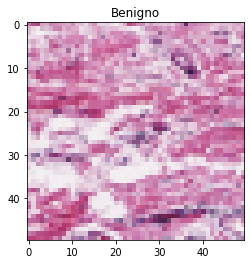

In [39]:
predplot=predict('/content/data_probar/B_10275_idx5_x1051_y351_class0.png')